# Insurance Claims- Fraud Detection

In [60]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Loading Dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### Here I have to create a model that predicts if an insurance claim is fraudulent or not. so the target variable is fraud_reported.

## Exploratory Data Analysis (EDA)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [63]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [64]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [65]:
#checking the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here it is showing 39 columns have 0 null values but last column(_c39) has all nan values so I am going to drop this column.

In [66]:
df=df.drop(columns=['_c39'])

In [67]:
df.shape

(1000, 39)

In [68]:
df = df.replace('?',np.NaN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

Here we can see 3 categorical columns (collision_type, property_damage, police_report_available) have missing values. Let's deal with them

In [69]:
#Handle Categorical missing values
for i in ('collision_type', 'property_damage', 'police_report_available'):
    print(df[i].value_counts()[df[i].value_counts() == df[i].value_counts().max()],'\n')
    print('********************')

Rear Collision    292
Name: collision_type, dtype: int64 

********************
NO    338
Name: property_damage, dtype: int64 

********************
NO    343
Name: police_report_available, dtype: int64 

********************


In [70]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['property_damage']=df['property_damage'].fillna('NO')
df['police_report_available']=df['police_report_available'].fillna('NO')

Here I use most frequent category because our dataset is small. This method works good for small dataset.

In [71]:
df.isnull().any().any()

False

In [72]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [73]:
# checking categorcial columns
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [74]:
# checking numeric columns
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [75]:
#Describe the data 
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<AxesSubplot:>

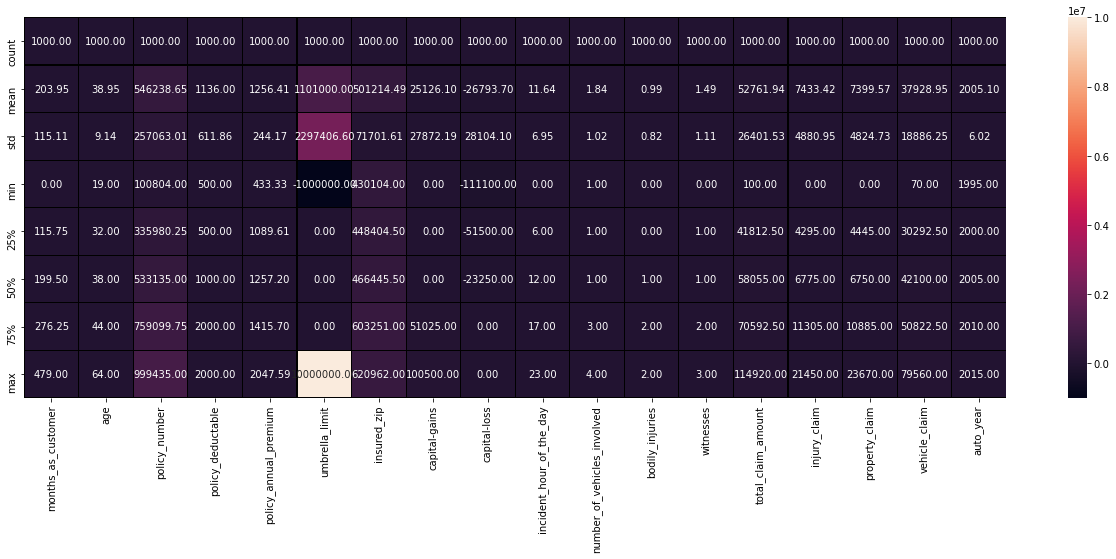

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidth=0.1 ,linecolor="black", fmt="0.2f")

### Visualization of important columns

N    753
Y    247
Name: fraud_reported, dtype: int64


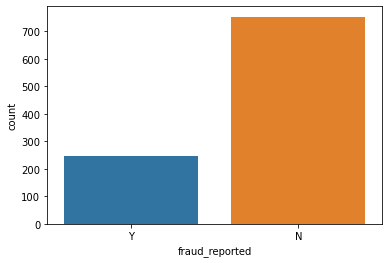

In [77]:
#For categorical data
ax = sns.countplot (x = "fraud_reported", data = df)
print(df["fraud_reported"].value_counts())

Observation - Fraud reported is less than not reported

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


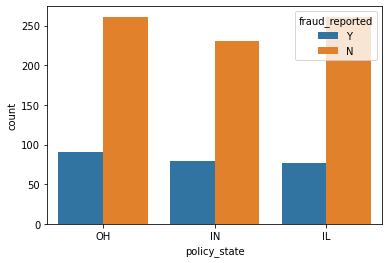

In [78]:
ax = sns.countplot (x = "policy_state", hue = "fraud_reported", data = df)
print(df["policy_state"].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


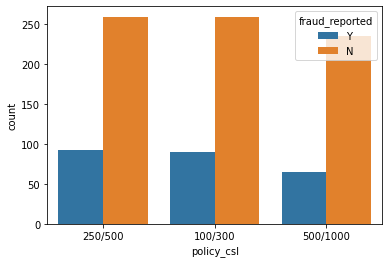

In [79]:
ax = sns.countplot (x = "policy_csl", hue = "fraud_reported", data = df)
print(df["policy_csl"].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


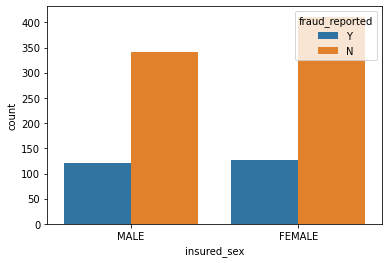

In [80]:
ax = sns.countplot (x = "insured_sex", hue = "fraud_reported", data = df)
print(df["insured_sex"].value_counts())

Observation - Faurd cases not Reported is more in case of female 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


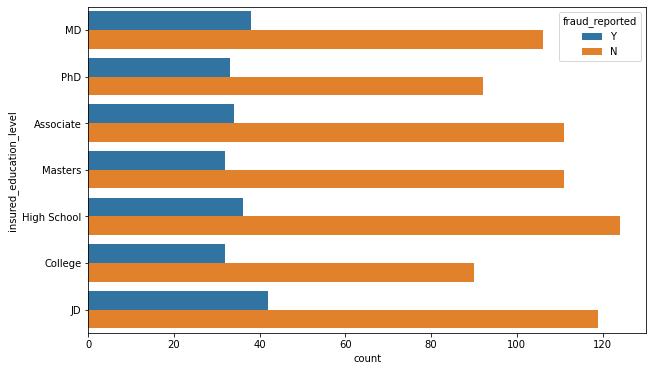

In [81]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', hue = "fraud_reported", data=df) 
print(df["insured_education_level"].value_counts())

Observation - Faurd cases not Reported more for high school going guys.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


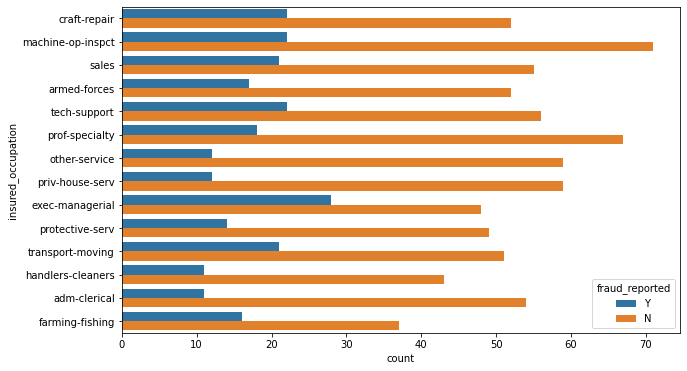

In [82]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_occupation', hue = "fraud_reported", data=df) 
print(df["insured_occupation"].value_counts())

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


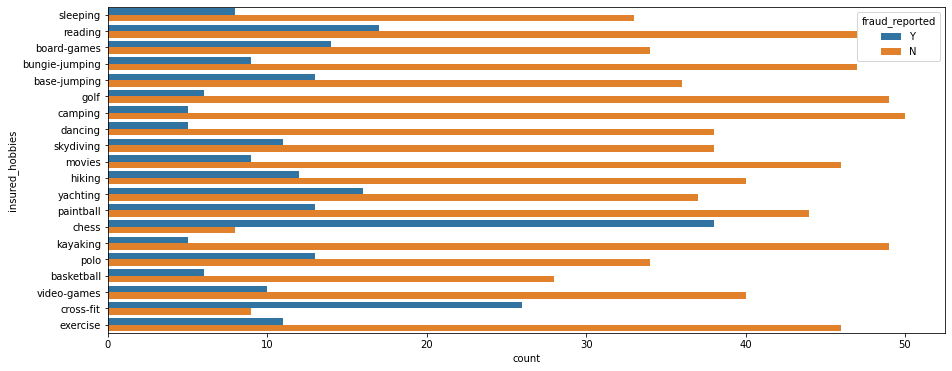

In [83]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(y = 'insured_hobbies', hue = "fraud_reported", data=df) 
print(df["insured_hobbies"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


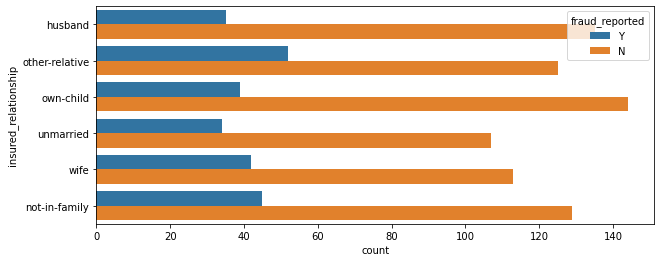

In [84]:
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(y = 'insured_relationship', hue = "fraud_reported", data=df) 
print(df["insured_relationship"].value_counts())

observation - In case of other relative Fraud Reported is max and in case of own child no faurd reported is max

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
10-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
31-01-2015    20
12-02-2015    20
22-02-2015    20
06-02-2015    20
21-01-2015    19
01-01-2015    19
21-02-2015    19
12-01-2015    19
23-02-2015    19
14-01-2015    19
25-02-2015    18
14-02-2015    18
03-01-2015    18
18-01-2015    18
20-01-2015    18
01-02-2015    18
28-02-2015    18
06-01-2015    17
26-02-2015    17
24-02-2015    17
09-01-2015    17
08-02-2015    17
16-01-2015    16
16-02-2015    16
15-02-2015    16
05-02-2015    16
13-02-2015    16
15-01-2015    15
17-01-2015    15
28-01-2015    15
18-02-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
09-02-2015    13
03-02-2015    13
23-01-2015    13
27-01-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
29-01-2015    11
26-01-2015    11
10-02-2015    10
11-02-2015    10
25-01-2015    10
07-02-2015    10
19-02-2015    10
11-01-2015    

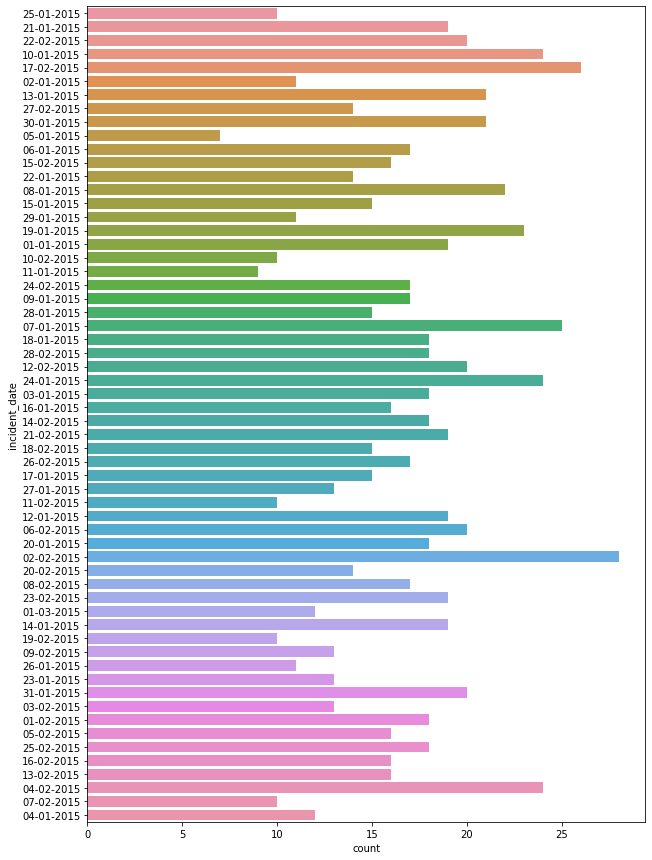

In [85]:
fig = plt.figure(figsize=(10,15))
ax = sns.countplot(y = 'incident_date', data=df) 
print(df["incident_date"].value_counts())

Observation-all the cases in this plot are for the January 2015 and February 2015

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


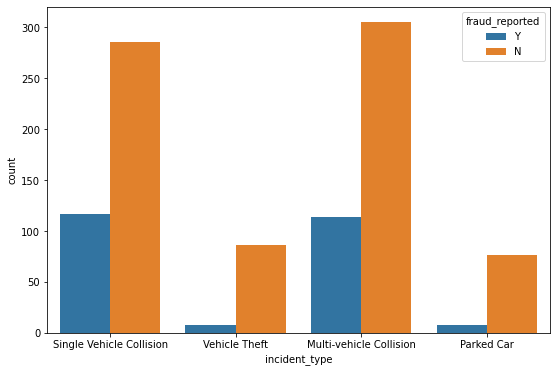

In [86]:
plt.figure(figsize=(9,6))
ax = sns.countplot (x = "incident_type", hue = "fraud_reported", data = df)
print(df["incident_type"].value_counts())

Observation - In case of Multi-vehicle Collision many Faurd cases are not Reported 

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


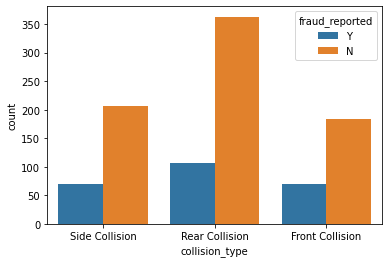

In [87]:
ax = sns.countplot (x = "collision_type", hue = "fraud_reported", data = df)
print(df["collision_type"].value_counts())

Observation - In case of Rear collision Fraud Reported cases are more

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


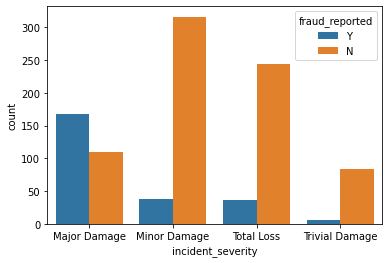

In [88]:
ax = sns.countplot (x = "incident_severity", hue = "fraud_reported", data = df)
print(df["incident_severity"].value_counts())

Observation - In case of Major Damage Fraud cases Reported are more and other side Minor damage many cases are not reported

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


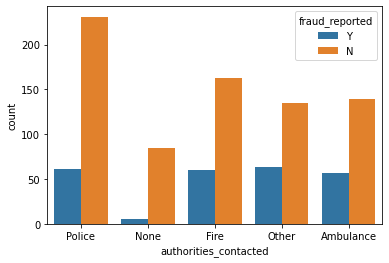

In [89]:
ax = sns.countplot (x = "authorities_contacted", hue = "fraud_reported", data = df)
print(df["authorities_contacted"].value_counts())

Observation - Cantacted with police more cases are not reported.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


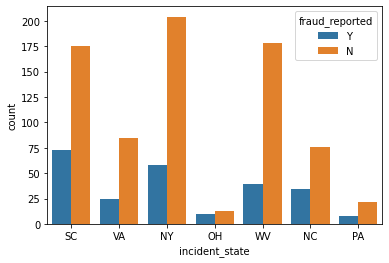

In [90]:
ax = sns.countplot (x = "incident_state", hue = "fraud_reported", data = df)
print(df["incident_state"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


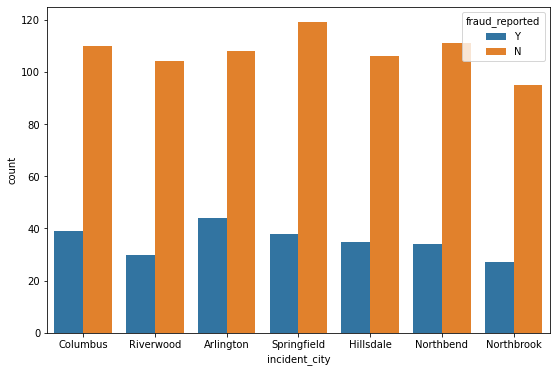

In [91]:
plt.figure(figsize=(9,6))
ax = sns.countplot (x = "incident_city", hue = "fraud_reported", data = df)
print(df["incident_city"].value_counts())

NO     698
YES    302
Name: property_damage, dtype: int64


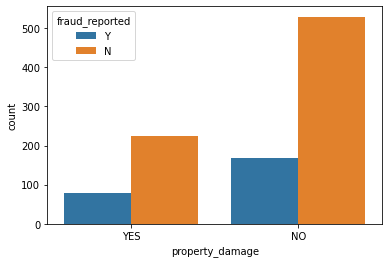

In [92]:
ax = sns.countplot (x = "property_damage", hue = "fraud_reported", data = df)
print(df["property_damage"].value_counts())

Observation - in case of less property damage fraud not reported is more

NO     686
YES    314
Name: police_report_available, dtype: int64


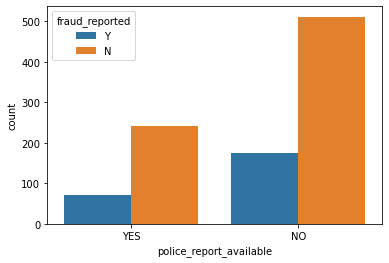

In [93]:
ax = sns.countplot (x = "police_report_available", hue = "fraud_reported", data = df)
print(df["police_report_available"].value_counts())

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


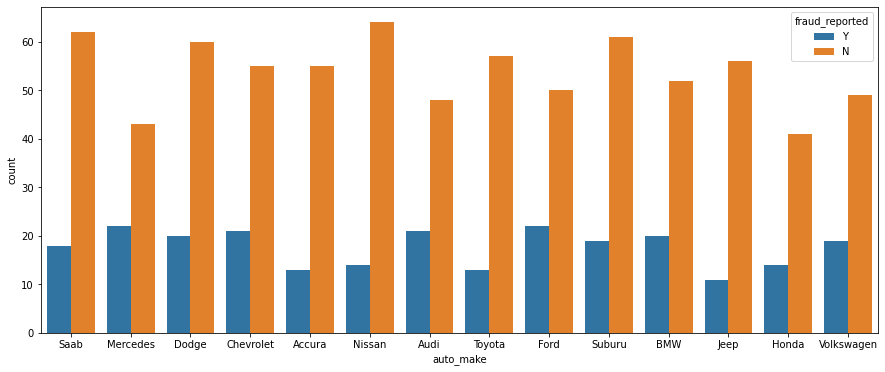

In [94]:
plt.figure(figsize=(15,6))
ax = sns.countplot (x = "auto_make", hue = "fraud_reported", data = df)
print(df["auto_make"].value_counts())

Observation - In case of ford and mercedes fraud reported is more, but in case of nissan fraud not reported is more

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
E400              27
95                27
F150              27
93                25
Grand Cherokee    25
Maxima            24
Escape            24
Tahoe             24
Ultima            23
X5                23
Civic             22
Silverado         22
Highlander        22
Fusion            21
TL                20
ML350             20
CRV               20
Corolla           20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


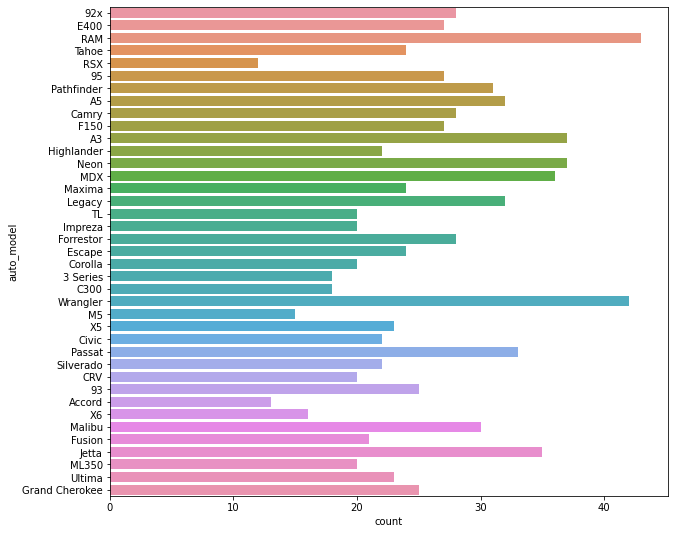

In [95]:
fig = plt.figure(figsize=(10,9))
ax = sns.countplot(y = 'auto_model', data=df) 
print(df["auto_model"].value_counts())

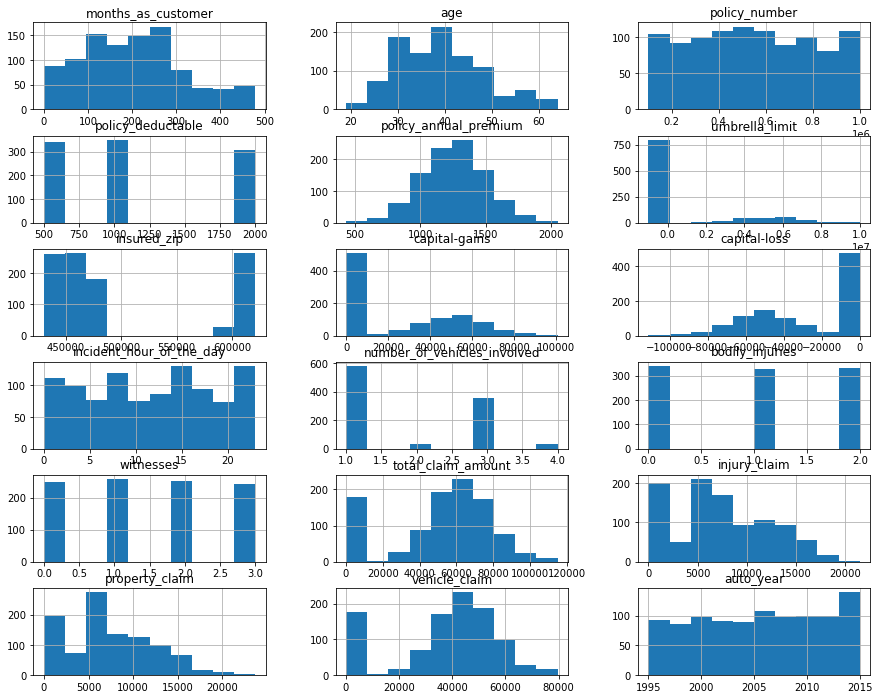

In [96]:
# Visualization For numerical data
df.hist(figsize=(15,12), layout=(6,3), sharex=False);

## Data Processing
Next, we will clean up the data a little and prepare it for our machine learning model.

We will first remove the columns that we have identified earlier that have too many distinct categories and cannot be converted to numeric

In [97]:
#Dropping the columns
df = df.drop(columns=["policy_number", "policy_bind_date", "policy_csl", "insured_zip", "incident_location", "incident_date","auto_year", "incident_hour_of_the_day"])

In [98]:
df.head(5)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [99]:
df.shape

(1000, 31)

In [100]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
          'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
          'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'):
    df[i] = le.fit_transform(df[i])

In [102]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,2,3,1,67500,7500,7500,52500,11,19,0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,0,1,1,46980,5220,5220,36540,1,5,0


In [103]:
# Checking corelation
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,...,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,...,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,...,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,...,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,...,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,...,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,...,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,...,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,...,-0.000236,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564
insured_hobbies,-0.093661,-0.081315,-0.038689,0.004061,-0.018019,-0.037000,-0.020317,0.021807,-0.011077,1.000000,...,0.031373,-0.033971,-0.027937,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.046838


<AxesSubplot:>

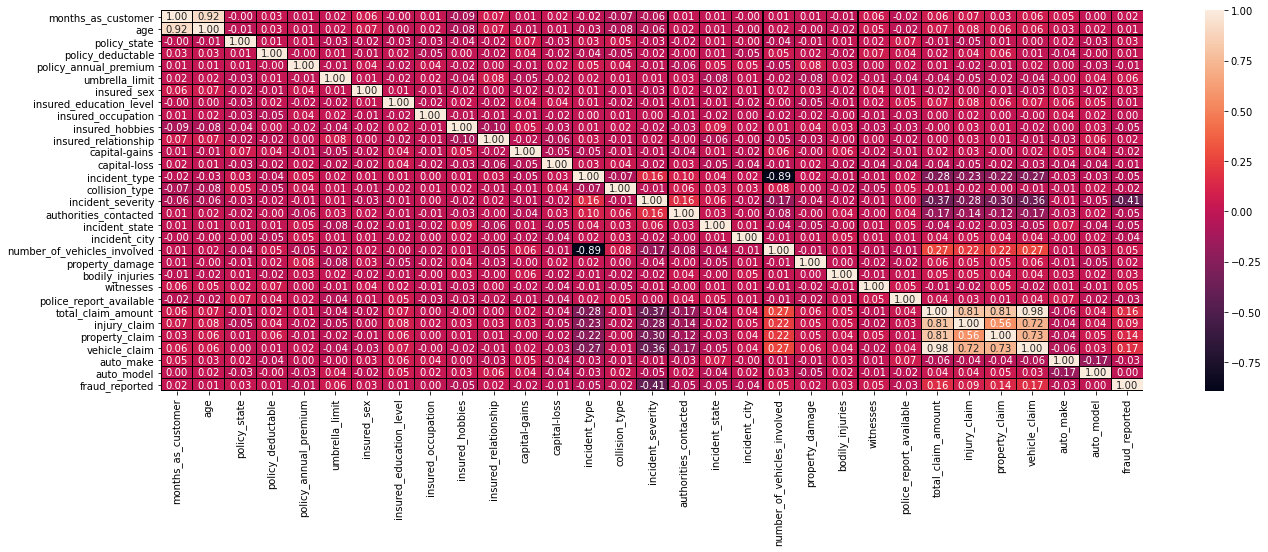

In [104]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")

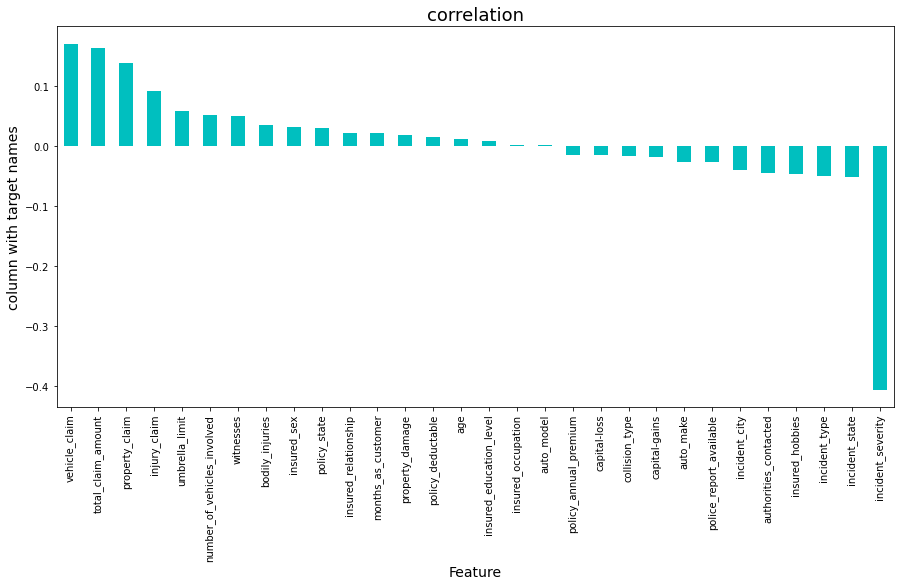

In [105]:
#checking correlation high to low 
plt.figure(figsize=(15,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar', color ='c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize = 18)
plt.show()

fraud_reported is least corelated with Incident Serverity

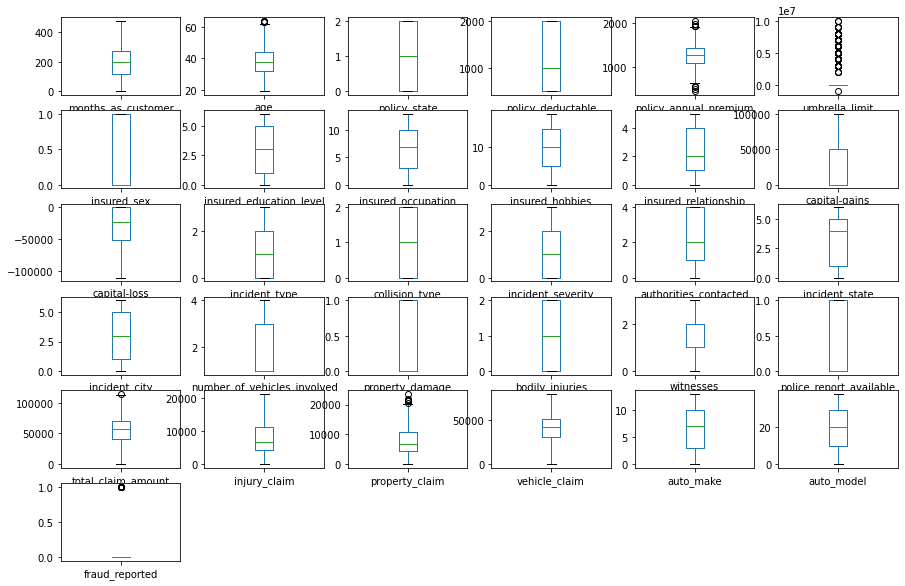

In [106]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(6,6), figsize=(15,10));

In [107]:
df.shape

(1000, 31)

In [108]:
# Considering the outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z<3)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64),
 array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))

In [109]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,1000,1436.79,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,2,3,1,67500,7500,7500,52500,11,19,0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,0,1,1,46980,5220,5220,36540,1,5,0


In [110]:
df_new_z.shape

(980, 31)

In [111]:
#Percentage loss of data:
Data_loss=((1000 - 980)/1000)*100
Data_loss

2.0

data loss is only 2 percent so, we can remove the outliers

In [112]:
df=df_new_z

In [117]:
# Seperating Independent Variables and Dependent Variables(Target Variables)
x=df.drop(['fraud_reported'], axis=1)
y=df['fraud_reported']

In [123]:
#Spliting data by train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

### Model building

In [124]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy on training data: {:,.3f}'.format(lr.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(lr.score(x_test, y_test)))

Accuracy on training data: 0.778
Accuracy on test data: 0.711


In [125]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_model = rf.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

print('Accuracy on training data: {:,.3f}'.format(rf.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(rf.score(x_test, y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.711


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
print(confusion_matrix(y_test, rf_pred))

[[197  11]
 [ 74  12]]


In [128]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       208
           1       0.52      0.14      0.22        86

    accuracy                           0.71       294
   macro avg       0.62      0.54      0.52       294
weighted avg       0.67      0.71      0.65       294



In [130]:
#Confusion Matrix for Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7789115646258503
Confusion Matrix: [[183  25]
 [ 40  46]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       208
           1       0.65      0.53      0.59        86

    accuracy                           0.78       294
   macro avg       0.73      0.71      0.72       294
weighted avg       0.77      0.78      0.77       294



In [131]:
# Cross Validation
pred_train = lr.predict(x_train)
pred_test =lr.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
max_accu=0
max_rs=0

In [132]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > max_accu:
        max_accu = cv_mean
        max_rs = j
    print(f'At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')
    print('\n')

At cross fold 2 cv score is 0.7571428571428571 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 3 cv score is 0.7469465863679856 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 4 cv score is 0.7530612244897958 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 5 cv score is 0.7530612244897958 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 6 cv score is 0.7540712753753306 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 7 cv score is 0.753061224489796 and accuracy score training is 0.7784256559766763 and accuracy for the testing is 0.7108843537414966


At cross fold 8 cv score is 0.754081700653072 and accuracy score training is 0.7784256559766763 and a

In [133]:
#Cross Validation for Logistic Regrssion:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Logistic Regression',cv_mean)

Cross validation score for Logistic Regression 0.7520576131687242


In [134]:
#Cross Validation for Decision Tree Classifier:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Decision Tree',cv_mean)

Cross validation score for Decision Tree 0.7622324159021407


In [135]:
# Regularization
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [136]:
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [137]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
lss= accuracy_score(y_test,pred_test)
lss

0.7108843537414966

In [138]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.12283908992399259

In [139]:
# Ensemble technique
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(2,15),'criterion':['gini','entrophy']}
rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [140]:
rf=DecisionTreeClassifier(criterion='gini',max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score: ',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

Accuracy Score:  74.14965986394559
Cross Validation Score: 80.91836734693875


In [158]:
import pickle
filename = 'insurance_claim.pkl'
pickle.dump(rf,open(filename,'wb'))

In [159]:
#Loading Model:
loaded_model=pickle.load(open('insurance_claim.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7414965986394558


In [160]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [161]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
Orginal,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
